In [9]:
import numpy as np
import pandas as pd
import random
import astetik as ast

def BTS_PD_Uncertainty(count):
    
    out = []
    
    ## running random pick of parameters for (count)
    
    for i in range(count):
        if i <= count:

            ## setting up input parameter ranges and steps (Note X must be 1!!!!)
            
            n_Radio = np.arange(6, 10, 0.027) # Number of radios
            n_BB = np.arange(7, 11, 0.03) # Number of baseband
            X_Radio = np.arange(420, 620, 1.73) ## Electricity consumption of radio in Watt
            X_Baseband = np.arange(52, 152, 0.34) ## Electricity consumption of baseband in Watt
            X_Data = np.arange(0.15, 0.35, 0.0083) ## Data share of selected site
            X_Marketshare = np.arange(0.26, 0.36, 0.00103) ##Marketshare of operator
                        
            ## random pick of input parameter values and calculating energy cosnumption
            
            E = (((random.choice(n_Radio)*random.choice(X_Radio)) + (random.choice(X_Baseband)*random.choice(n_BB)))* 24 * 365)/1000000/random.choice(X_Marketshare)/random.choice(X_Data)

            out.append([E])
            
            results = pd.DataFrame(out)
            results.columns = ['E']
    return pd.DataFrame(results)
    

Mean value is 616.1366133624983 : Standard deviation is 198.978955119358
Min value is 218.11457479194345 : Max value is 1627.9000584000094


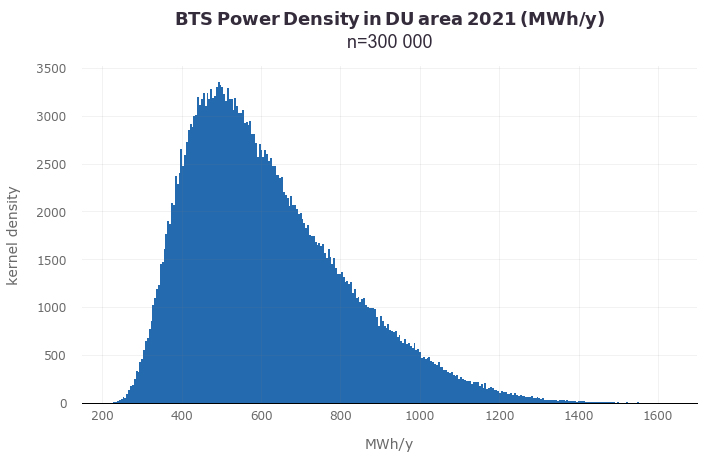

In [10]:
scores = BTS_PD_Uncertainty(300000)

## plotting histogram

ast.hist(scores, 'E', bins=300, x_limit=None,

                 title='BTS Power Density in DU area 2021 (MWh/y)',

                 sub_title='n=300 000',
             
                 x_label='MWh/y',

                 y_label='kernel density')

## calculating distribution KPIs

print('Mean value is', scores['E'].mean(), ':', 'Standard deviation is', scores['E'].std())
print('Min value is', scores['E'].min(), ':', 'Max value is', scores['E'].max())